<a href="https://colab.research.google.com/github/ancestor9/2025_Spring_Capstone-Design/blob/main/Week13/1D_Kernel_Density_Estimation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1D Kernel Density Estimation (KDE)
- Grid Search는 주로 핵심 파라미터인 bandwidth를 최적화하는 데 사용
- https://scikit-learn.org/stable/auto_examples/neighbors/plot_kde_1d.html

In [1]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KernelDensity
import numpy as np

# 샘플 데이터
X = np.random.normal(size=(100, 1))

# Bandwidth 후보 설정
bandwidths = np.linspace(0.1, 1.0, 30)

# GridSearchCV 설정
grid = GridSearchCV(KernelDensity(kernel='gaussian'),
                    {'bandwidth': bandwidths},
                    cv=5)  # 5-fold cross-validation

grid.fit(X)

# 최적 bandwidth
best_bandwidth = grid.best_params_['bandwidth']


In [5]:
import pandas as pd
pd.DataFrame(grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_bandwidth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001145,0.000587,0.000710,0.000109,0.100000,{'bandwidth': 0.1},-34.384421,-28.755892,-27.776709,-41.601960,-27.895228,-32.082842,5.348988,30
1,0.001254,0.000852,0.000602,0.000065,0.131034,{'bandwidth': 0.1310344827586207},-31.429407,-27.627761,-27.349300,-37.976243,-27.168270,-30.310196,4.143790,29
2,0.001534,0.001043,0.001684,0.001084,0.162069,{'bandwidth': 0.16206896551724137},-30.053043,-27.222265,-27.082927,-36.300521,-26.856510,-29.503053,3.593640,25
3,0.001650,0.001083,0.001199,0.000337,0.193103,{'bandwidth': 0.19310344827586207},-29.301569,-27.075961,-26.904555,-35.297581,-26.744586,-29.064850,3.252973,21
4,0.001700,0.000431,0.003014,0.003246,0.224138,{'bandwidth': 0.22413793103448276},-28.835939,-27.029948,-26.781727,-34.575106,-26.730052,-28.790554,2.994792,17
5,0.002604,0.002672,0.001878,0.001183,0.255172,{'bandwidth': 0.25517241379310346},-28.527164,-27.017586,-26.701087,-34.019632,-26.758142,-28.604722,2.788546,15
6,0.002626,0.002328,0.001968,0.002738,0.286207,{'bandwidth': 0.28620689655172415},-28.317340,-27.012711,-26.653411,-33.585454,-26.802710,-28.474325,2.622771,12
7,0.003397,0.003431,0.002006,0.001197,0.317241,{'bandwidth': 0.3172413793103448},-28.173619,-27.007829,-26.631221,-33.240802,-26.853125,-28.381319,2.487666,10
8,0.001738,0.000836,0.001275,0.001060,0.348276,{'bandwidth': 0.34827586206896555},-28.075183,-27.003275,-26.629271,-32.960650,-26.906540,-28.314984,2.374264,7
9,0.000736,0.000089,0.000576,0.000032,0.379310,{'bandwidth': 0.3793103448275862},-28.008989,-27.002159,-26.644342,-32.727006,-26.963514,-28.269202,2.275527,5


## KDE가 bandwidth에 따라 어떻게 달라지는지?

- 0.1 (위쪽): 곡선이 매우 울퉁불퉁함 → 데이터에 너무 민감 → 과적합
- 0.3 (가운데): 부드러우면서도 분포의 두 봉우리를 잘 잡음 → 적절
- 0.7 (아래쪽): 너무 평탄하게 퍼짐 → 중요한 특징이 흐려짐 → 과소적합

#### KDE는 적절한 bandwidth를 찾아서 모델이 데이터의 실제 분포를 가장 잘 설명하게 만드는 게 핵심

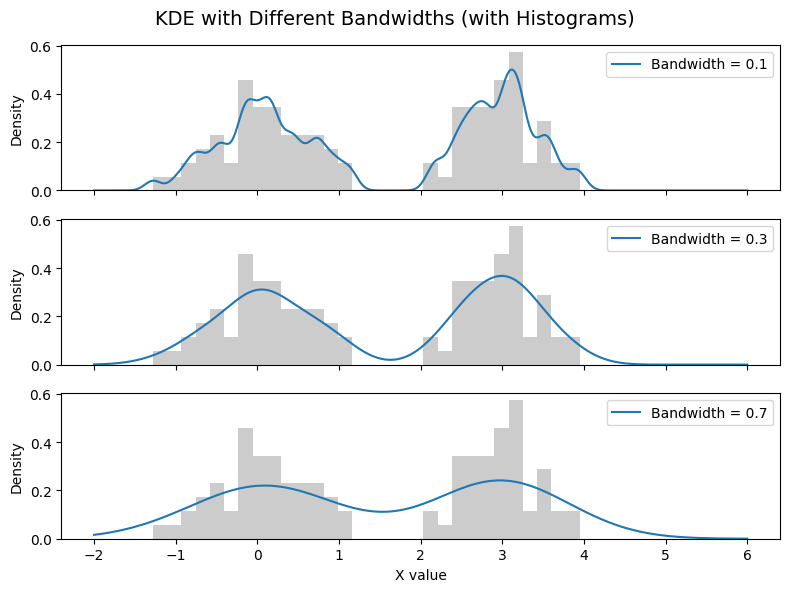

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KernelDensity

# 데이터 생성 (1D)
np.random.seed(0)
X = np.concatenate([
    np.random.normal(0, 0.5, 50),
    np.random.normal(3, 0.5, 50)
])[:, np.newaxis]

# bandwidth 후보군
bandwidths = [0.1, 0.3, 0.7]

# 시각화용 x 범위 설정
x_plot = np.linspace(-2, 6, 1000)[:, np.newaxis]

# 시각화
fig, axs = plt.subplots(len(bandwidths), 1, figsize=(8, 6), sharex=True)

for i, bw in enumerate(bandwidths):
    kde = KernelDensity(kernel='gaussian', bandwidth=bw).fit(X)
    log_dens = kde.score_samples(x_plot)

    axs[i].plot(x_plot[:, 0], np.exp(log_dens), label=f'Bandwidth = {bw}')
    axs[i].hist(X[:, 0], bins=30, density=True, alpha=0.4, color='gray')
    axs[i].legend(loc='upper right')
    axs[i].set_ylabel("Density")

axs[-1].set_xlabel("X value")
fig.suptitle("KDE with Different Bandwidths (with Histograms)", fontsize=14)
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()
